# K-Means Algorithm: Step by Step

1. ### The first step chooses the initial K centroids randomly 
#### After initialization, K-means consists of looping between the next two steps. 
* ### Assigning each sample to its nearest centroid. 
* ### Creating new centroids by taking the mean value of all of the samples assigned to each previous cluster 
* ### The algorithm repeats these last two steps until  the centroids do not move significantly.

### Since the first steps assigns K centroids randomly,  the entire process can be repeated with different starting points

In [1]:
# Initializing the values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.size']=14
plt.rcParams['lines.markersize']=7
plt.rcParams['axes.grid']=True
plt.rcParams['axes.labelsize']=16
plt.rcParams['figure.figsize'] = (5,5)

In [3]:
df = pd.DataFrame({
    'Num_flights': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'Avg_fare': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]})
df = df[['Num_flights','Avg_fare']]
df.head()

,Num_flights,Avg_fare
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


In [4]:
np.random.seed(200)
k = 3
centroids = { i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)}
centroids 

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

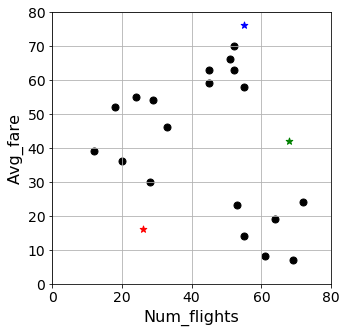

In [5]:
plt.scatter(df['Num_flights'], df['Avg_fare'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i], marker='*')
plt.xlabel('Num_flights')
plt.ylabel('Avg_fare')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [6]:
#Calculating the distance and assigning the clusters
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt((df['Num_flights'] - centroids[i][0]) ** 2 + (df['Avg_fare'] - centroids[i][1]) ** 2))
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [7]:
df = assignment(df, centroids)
df.head()

,Num_flights,Avg_fare,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b


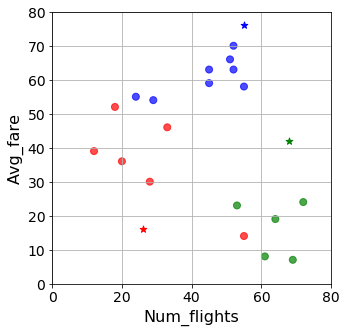

In [8]:
plt.scatter(df['Num_flights'], df['Avg_fare'], color=df['color'], alpha=0.7)
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i], marker='*')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.xlabel('Num_flights')
plt.ylabel('Avg_fare')
plt.show()

In [9]:
# Update Stage
import copy
old_centroids = copy.deepcopy(centroids)
old_centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

In [10]:
def update(k):
    for i in k.keys():
        k[i][0] = np.mean(df[df['closest'] == i]['Num_flights'])
        k[i][1] = np.mean(df[df['closest'] == i]['Avg_fare'])
    return k

In [11]:
centroids = update(centroids)
print('old centroids',old_centroids)
print('Updated centroids', centroids)

old centroids {1: [26, 16], 2: [68, 42], 3: [55, 76]}
Updated centroids {1: [27.666666666666668, 36.166666666666664], 2: [63.8, 16.2], 3: [44.125, 61.0]}


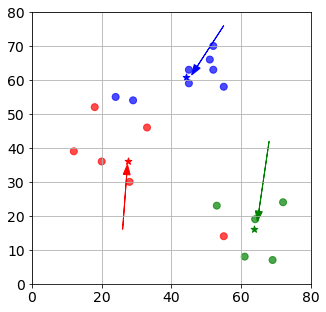

In [12]:
ax = plt.axes()
plt.scatter(df['Num_flights'], df['Avg_fare'], color=df['color'], alpha=0.7)
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i], marker='*')
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.7
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.8
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

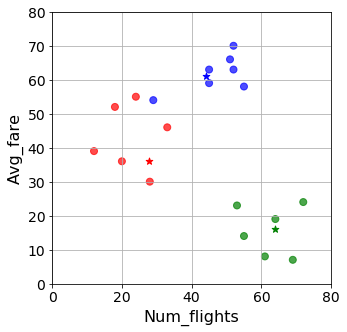

In [13]:
# Repeat Assigment Stage
df = assignment(df, centroids)
# Plot results
plt.scatter(df['Num_flights'], df['Avg_fare'], color=df['color'], alpha=0.7)
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i], marker='*')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.xlabel('Num_flights')
plt.ylabel('Avg_fare')
plt.show()

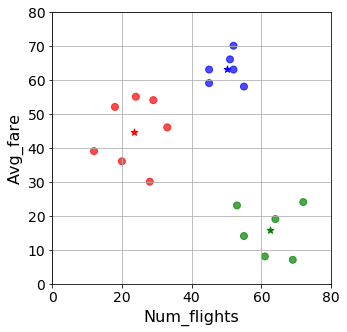

In [16]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

plt.scatter(df['Num_flights'], df['Avg_fare'], color=df['color'], alpha=0.7)
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i], marker='*')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.xlabel('Num_flights')
plt.ylabel('Avg_fare')
plt.show()

In [15]:
centroids

{1: [23.428571428571427, 44.57142857142857],
 2: [62.333333333333336, 15.833333333333334],
 3: [50.0, 63.166666666666664]}

# Implementing K-Means using Sklearn

In [17]:
from sklearn.cluster import KMeans

In [18]:
df = pd.DataFrame({
    'Num_flights': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'Avg_fare': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]})
df = df[['Num_flights','Avg_fare']]
df.head()

,Num_flights,Avg_fare
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.predict(df)
labels

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [29]:
sk_centroids = kmeans.cluster_centers_
sk_centroids

array([[23.42857143, 44.57142857],
       [62.33333333, 15.83333333],
       [50.        , 63.16666667]])

In [30]:
kmeans.inertia_

1624.4285714285716

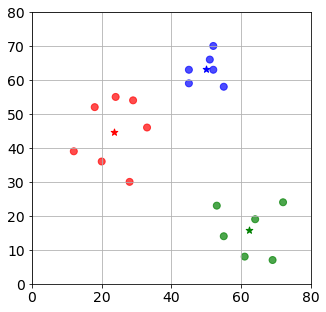

In [31]:
colors = map(lambda x: colmap[x+1], labels)
colors1=list(colors)
plt.scatter(df['Num_flights'], df['Avg_fare'], color=colors1, alpha=0.7)
for idx, centroid in enumerate(sk_centroids):
    plt.scatter(centroid[0], centroid[1], color=colmap[idx+1], marker='*')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [32]:
inertia_list = []
for num_clusters in np.arange(1, 11):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

In [33]:
inertia_list

[13654.210526315788,
 5022.628205128204,
 1624.4285714285716,
 1081.75,
 850.9166666666666,
 647.0833333333334,
 537.6666666666667,
 424.5,
 312.25,
 270.5833333333333]

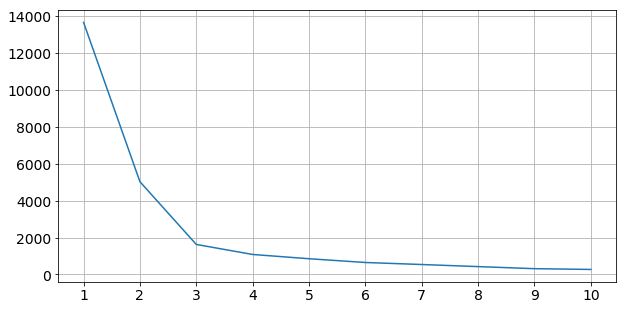

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 11), inertia_list)
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

###  We can choose the number of runs in each iteration (max_iter), and the number of starting points(init)

In [ ]:
kmeans?

In [ ]:
kmeans = KMeans(n_init=30, max_iter=300)